In [96]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [97]:
def solve_d(d_f, a, c, tz):
    if a > 0:
        return (-c + np.sqrt(c**2. - 4. * a * (tz - d_f))) / (2. * a)
    else:
        tmp = (-c - np.sqrt(c**2. - 4. * a * (tz - d_f))) / (2. * a)
        if abs(tmp - d_f) / d_f > 0.1:
            return (-c + np.sqrt(c**2. - 4. * a * (tz - d_f))) / (2. * a)
        else:
            return tmp

def solve_d_a(d_f, c, tz):
    return (d_f - tz) / c

In [98]:
calib_coeff_banks = list()
cov_m_banks = list()
difc_init_banks = [
    1433.3960233983368653,
    2866.6722038003063062,
    5649.3124748743930468,
    9112.7315727816494473,
    9940.9924076531206083,
    860.0359868547575388
]

# Bank-1

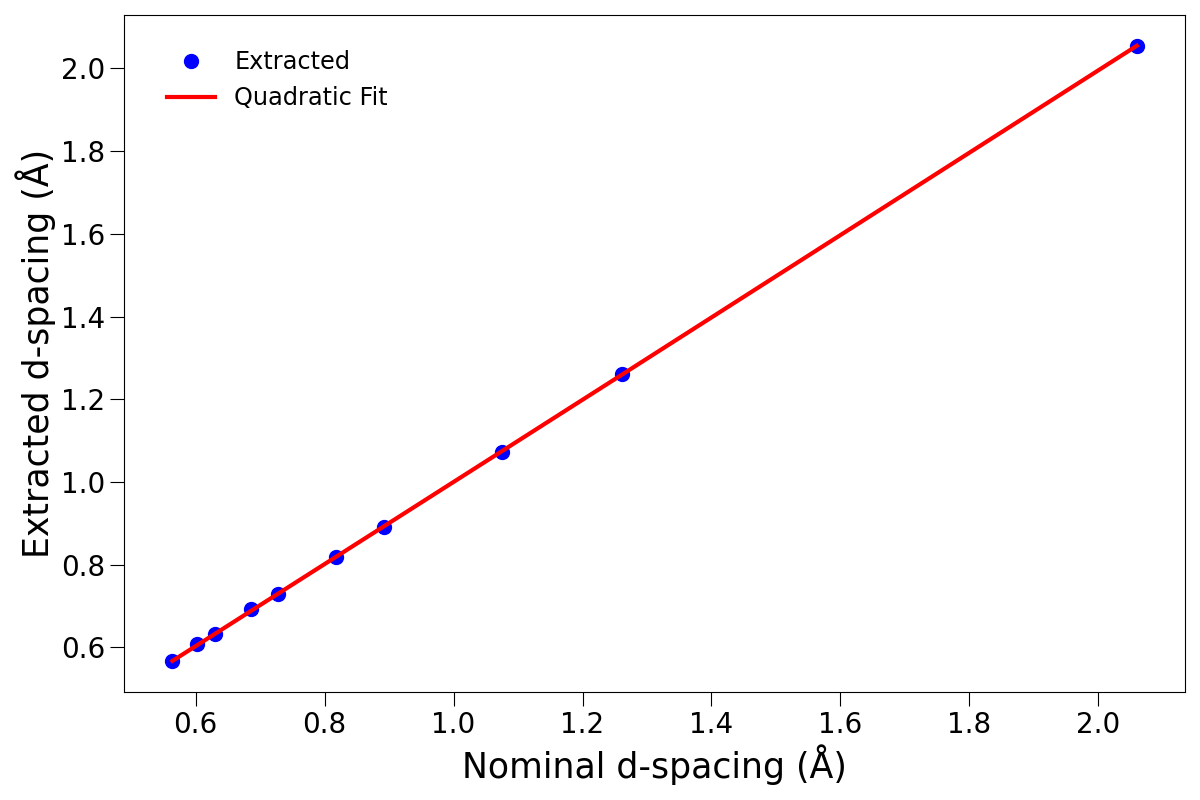

In [99]:
d_norm = [
    0.5640127652342305,
    0.6029550083638444,
    0.6305854416206848,
    0.6864944760881191,
    0.7281373489335229,
    0.8183557318726158,
    0.891782483775,
    1.0755301430155917,
    1.2611708832413695,
    2.0594834282643575]

d_fitted = [
    0.5664135488547407,
    0.6074838637658722,
    0.632084348687512,
    0.691608505080278,
    0.7288016167251875,
    0.8178417653847683,
    0.890852400827517,
    1.0734682803234035,
    1.2621420269960635,
    2.0543999878419172]

calib_coeff, cov_m = np.polyfit(d_norm, d_fitted, 2, cov=True)
calib_coeff_banks.append(calib_coeff)
cov_m_banks.append(cov_m)

d_calib = [calib_coeff[0] * d**2. + calib_coeff[1] * d + calib_coeff[2] for d in d_norm]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_fitted, 'bo', markersize=10, label="Extracted")
ax.plot(d_norm, d_calib, 'r-', linewidth=3, label="Quadratic Fit")

ax.set_xlabel(r'Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel('Extracted d-spacing (Å)', fontsize=25)
# ax.set_xlim([800, 6000])
# ax.set_xticks(np.arange(800, 6400, 800), fontsize=23)
ax.tick_params(axis='x', labelsize=20, length=10)
# ax.set_yticks(np.arange(0.5, 2.2, 0.2), fontsize=23)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False, fontsize="xx-large")
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_1_d_extract_d_norm.png', dpi=300)
plt.show()

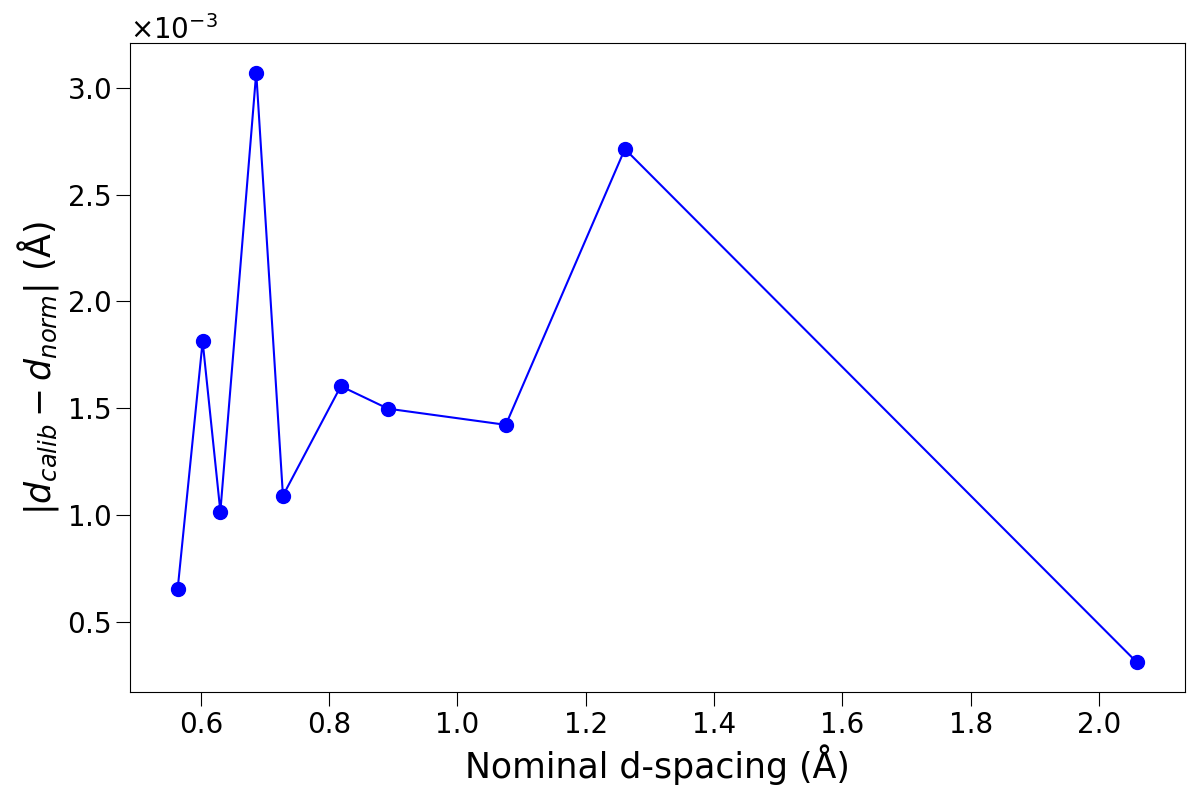

In [100]:
d_calib_diff = list()
for count, item in enumerate(d_fitted):
    d_tmp = solve_d(item, calib_coeff[0], calib_coeff[1], calib_coeff[2])
    d_calib_diff.append(abs(d_tmp - d_norm[count]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_calib_diff, 'bo-', markersize=10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel(r'$|d_{calib} - d_{norm}|$ (Å)', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_1_d_calib_d_norm_diff.png', dpi=300)
plt.show()

# Bank-2

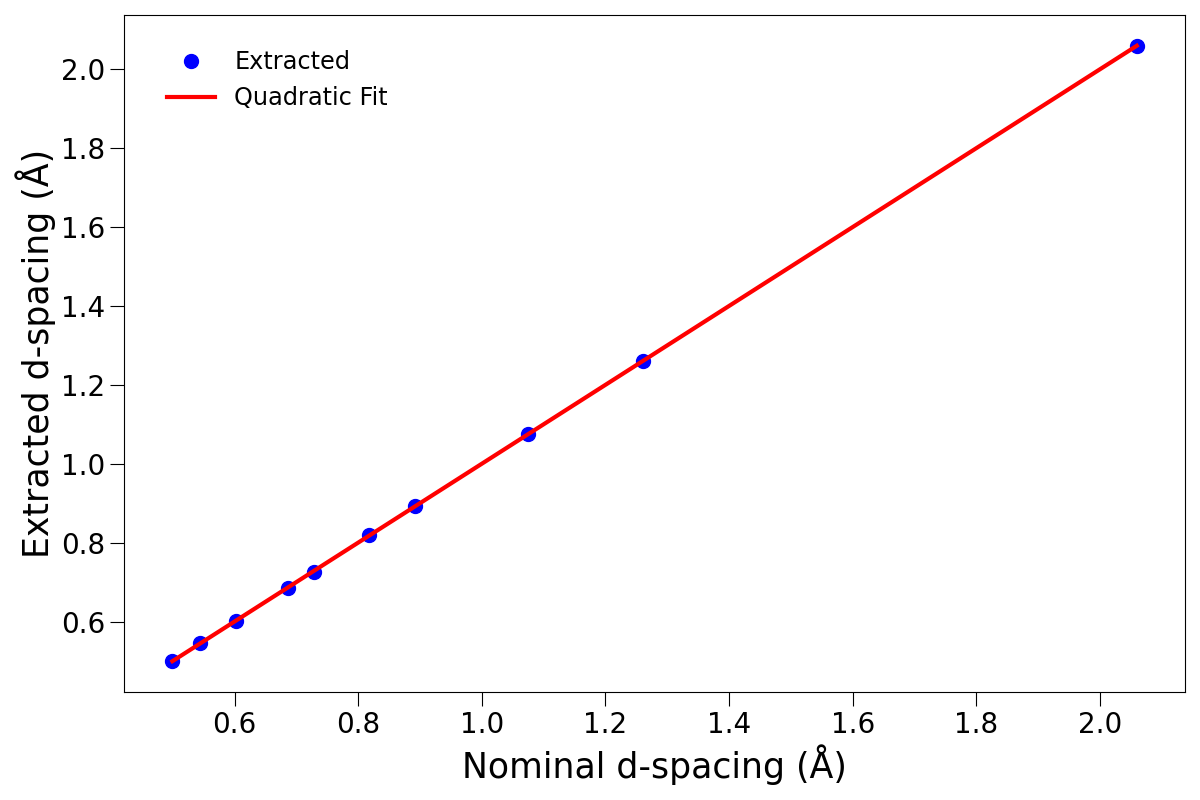

In [101]:
d_norm = [
    0.4994981005260657,
    0.5439822152933869,
    0.6029550083638444,
    0.6864944760881191,
    0.7281373489335229,
    0.8183557318726158,
    0.891782483775,
    1.0755301430155917,
    1.2611708832413695,
    2.0594834282643575]

d_fitted = [
    0.5021565369722811,
    0.5472242086461999,
    0.6047284617858967,
    0.6882868559100579,
    0.7285910450261273,
    0.8204343179578371,
    0.8934374651638729,
    1.0773209835843838,
    1.2627152405834041,
    2.059312098688157]

calib_coeff, cov_m = np.polyfit(d_norm, d_fitted, 2, cov=True)
calib_coeff_banks.append(calib_coeff)
cov_m_banks.append(cov_m)

d_calib = [calib_coeff[0] * d**2. + calib_coeff[1] * d + calib_coeff[2] for d in d_norm]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_fitted, 'bo', markersize=10, label="Extracted")
ax.plot(d_norm, d_calib, 'r-', linewidth=3, label="Quadratic Fit")

ax.set_xlabel(r'Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel('Extracted d-spacing (Å)', fontsize=25)
# ax.set_xlim([800, 6000])
# ax.set_xticks(np.arange(800, 6400, 800), fontsize=23)
ax.tick_params(axis='x', labelsize=20, length=10)
# ax.set_yticks(np.arange(0.5, 2.2, 0.2), fontsize=23)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False, fontsize="xx-large")
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_2_d_extract_d_norm.png', dpi=300)
plt.show()

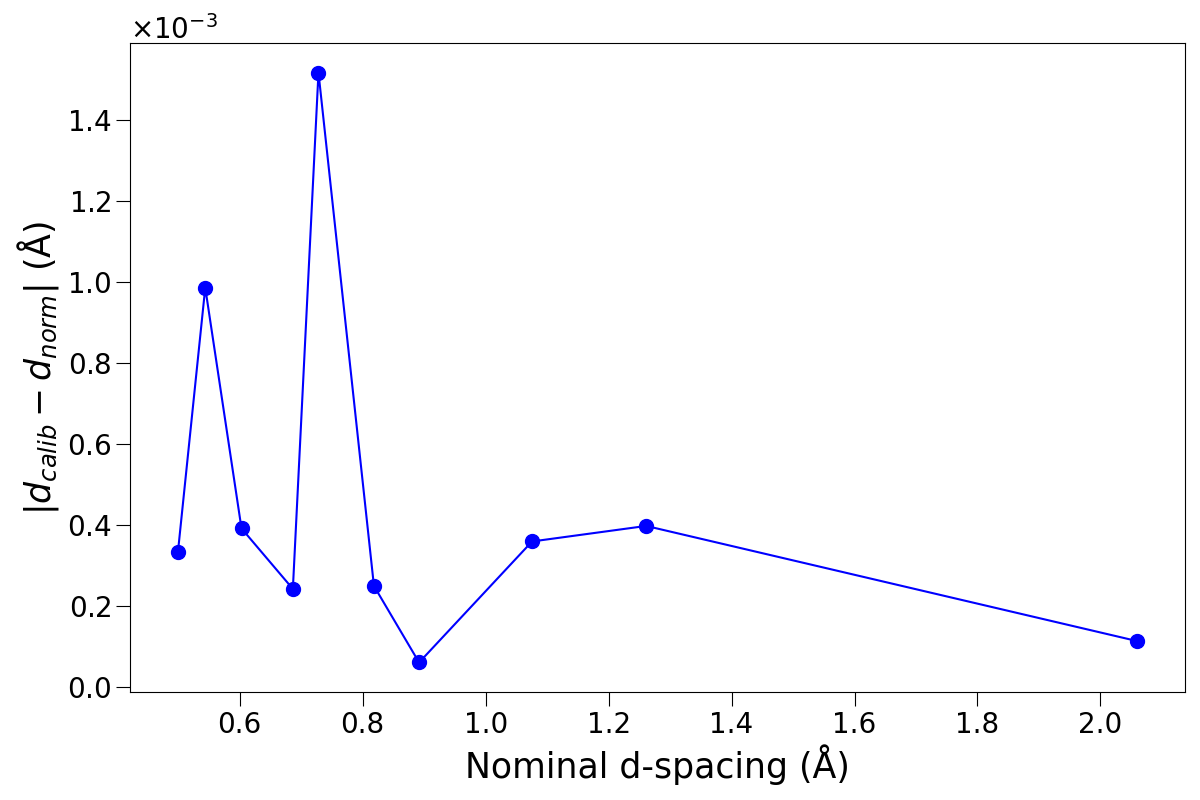

In [102]:
d_calib_diff = list()
for count, item in enumerate(d_fitted):
    d_tmp = solve_d(item, calib_coeff[0], calib_coeff[1], calib_coeff[2])
    d_calib_diff.append(abs(d_tmp - d_norm[count]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_calib_diff, 'bo-', markersize=10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel(r'$|d_{calib} - d_{norm}|$ (Å)', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_2_d_calib_d_norm_diff.png', dpi=300)
plt.show()

# Bank-3

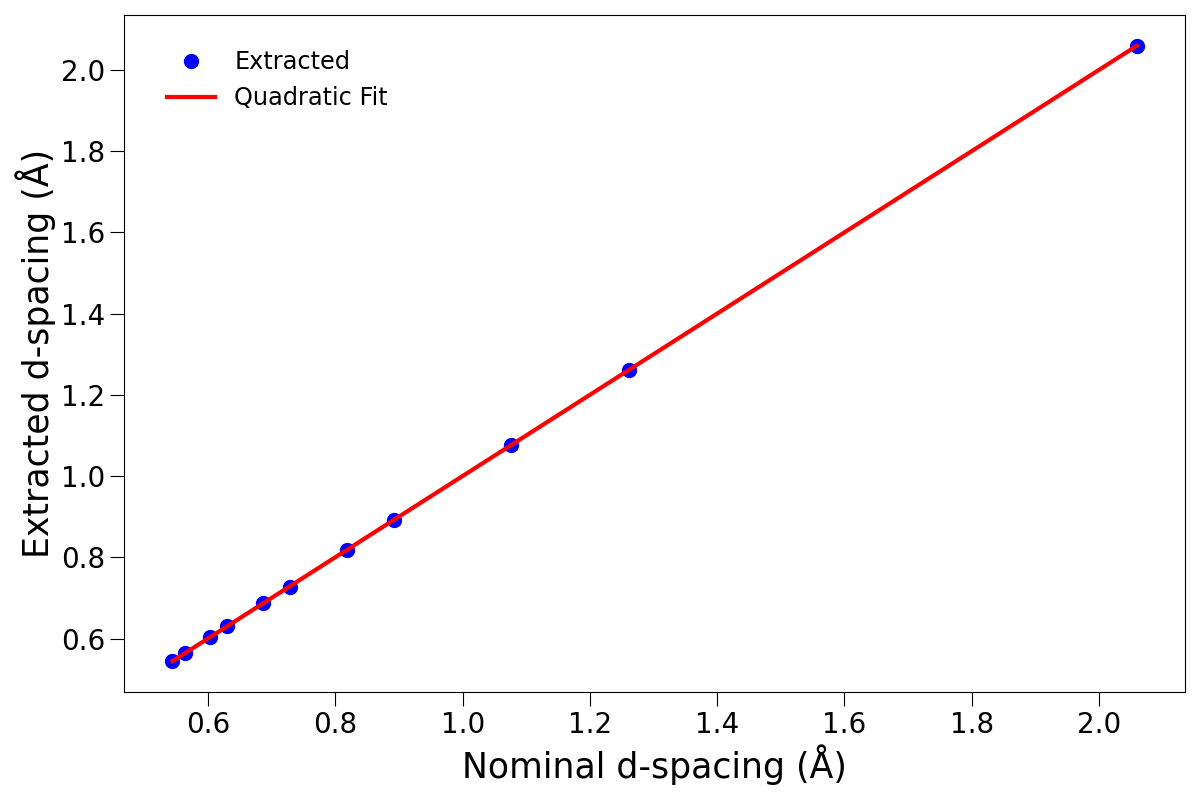

In [103]:
d_norm = [
    0.543982,
    0.564013,
    0.602955,
    0.630585,
    0.686494,
    0.728137,
    0.818356,
    0.891782,
    1.07553,
    1.261171,
    2.059483]

d_fitted = [
    0.544670711923317,
    0.5646784443547747,
    0.6036213675799109,
    0.6311645023882531,
    0.687044853914861,
    0.7285196825225992,
    0.8190328491463208,
    0.8922793252898498,
    1.0758684442721809,
    1.2613208928501554,
    2.0594732432908414]

calib_coeff, cov_m = np.polyfit(d_norm, d_fitted, 2, cov=True)
calib_coeff_banks.append(calib_coeff)
cov_m_banks.append(cov_m)

d_calib = [calib_coeff[0] * d**2. + calib_coeff[1] * d + calib_coeff[2] for d in d_norm]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_fitted, 'bo', markersize=10, label="Extracted")
ax.plot(d_norm, d_calib, 'r-', linewidth=3, label="Quadratic Fit")

ax.set_xlabel(r'Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel('Extracted d-spacing (Å)', fontsize=25)
# ax.set_xlim([800, 6000])
# ax.set_xticks(np.arange(800, 6400, 800), fontsize=23)
ax.tick_params(axis='x', labelsize=20, length=10)
# ax.set_yticks(np.arange(0.5, 2.2, 0.2), fontsize=23)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False, fontsize="xx-large")
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_3_d_extract_d_norm.png', dpi=300)
plt.show()

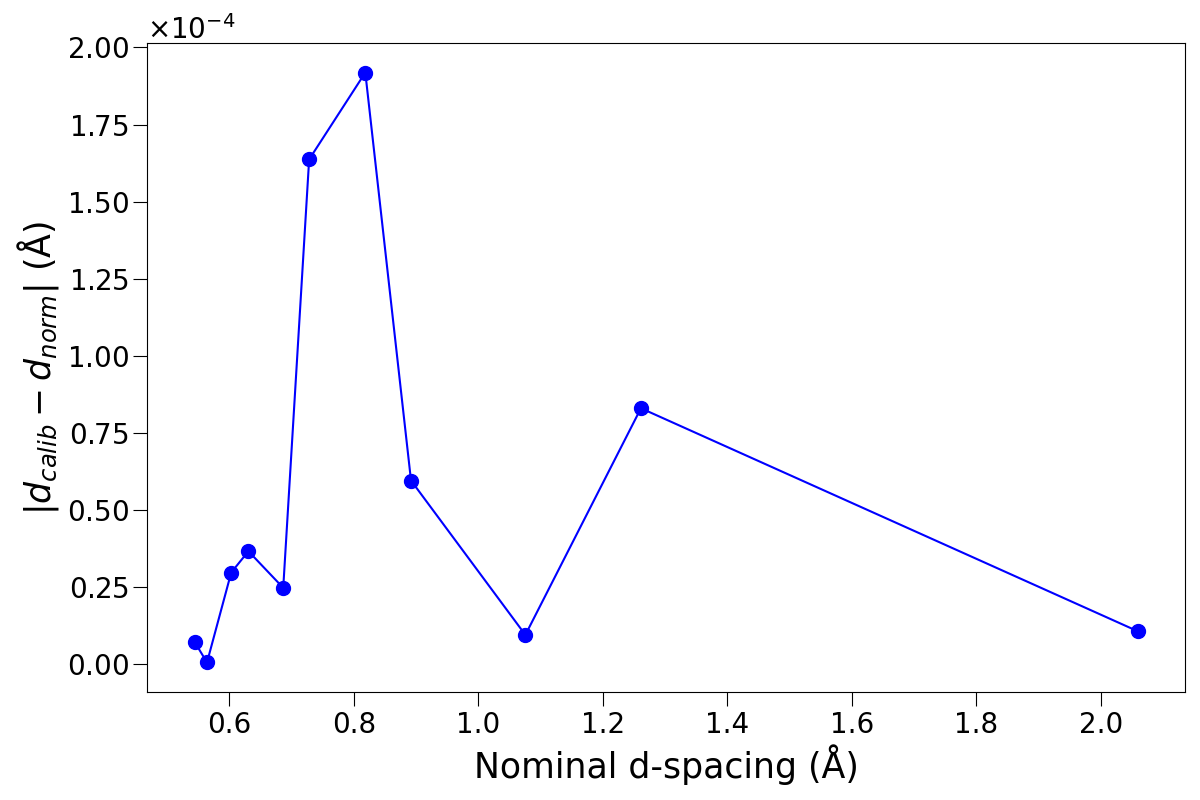

In [104]:
d_calib_diff = list()
for count, item in enumerate(d_fitted):
    d_tmp = solve_d(item, calib_coeff[0], calib_coeff[1], calib_coeff[2])
    d_calib_diff.append(abs(d_tmp - d_norm[count]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_calib_diff, 'bo-', markersize=10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel(r'$|d_{calib} - d_{norm}|$ (Å)', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_3_d_calib_d_norm_diff.png', dpi=300)
plt.show()

# Bank-4

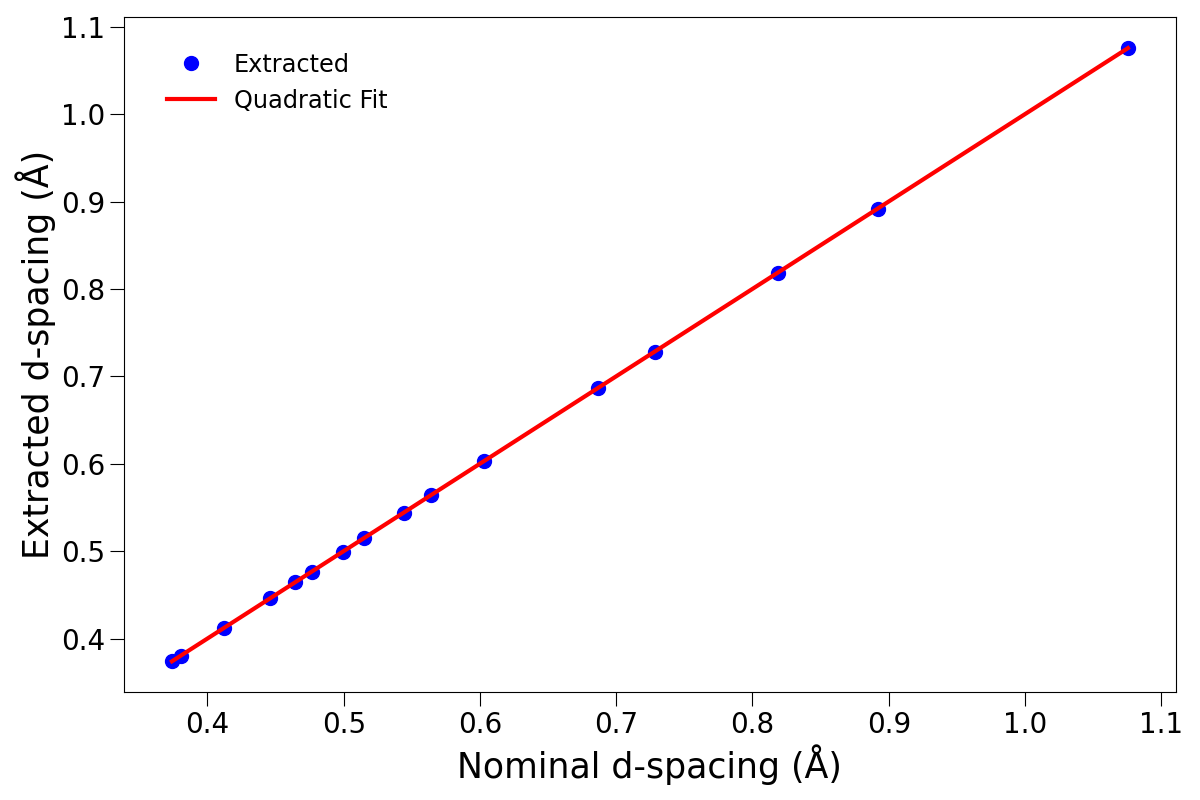

In [105]:
d_norm = [
    0.373937,
    0.380257,
    0.411897,
    0.445891,
    0.464401,
    0.476678,
    0.499498,
    0.514871,
    0.543982,
    0.564013,
    0.602955,
    0.686494,
    0.728137,
    0.818356,
    0.891782,
    1.07553]

d_fitted = [
    0.3742336825775085,
    0.38043073725319265,
    0.41218607757743536,
    0.4460968067052534,
    0.46468289935426377,
    0.476883306281186,
    0.49978147609638696,
    0.5150801813744194,
    0.5442410019858915,
    0.5642486028346944,
    0.603217492801678,
    0.6867422752137753,
    0.7283584784344146,
    0.8185874170357257,
    0.8919537395609726,
    1.0756168109732727]

calib_coeff, cov_m = np.polyfit(d_norm, d_fitted, 2, cov=True)
calib_coeff_banks.append(calib_coeff)
cov_m_banks.append(cov_m)

d_calib = [calib_coeff[0] * d**2. + calib_coeff[1] * d + calib_coeff[2] for d in d_norm]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_fitted, 'bo', markersize=10, label="Extracted")
ax.plot(d_norm, d_calib, 'r-', linewidth=3, label="Quadratic Fit")

ax.set_xlabel(r'Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel('Extracted d-spacing (Å)', fontsize=25)
# ax.set_xlim([800, 6000])
# ax.set_xticks(np.arange(800, 6400, 800), fontsize=23)
ax.tick_params(axis='x', labelsize=20, length=10)
# ax.set_yticks(np.arange(0.5, 2.2, 0.2), fontsize=23)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False, fontsize="xx-large")
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_4_d_extract_d_norm.png', dpi=300)
plt.show()

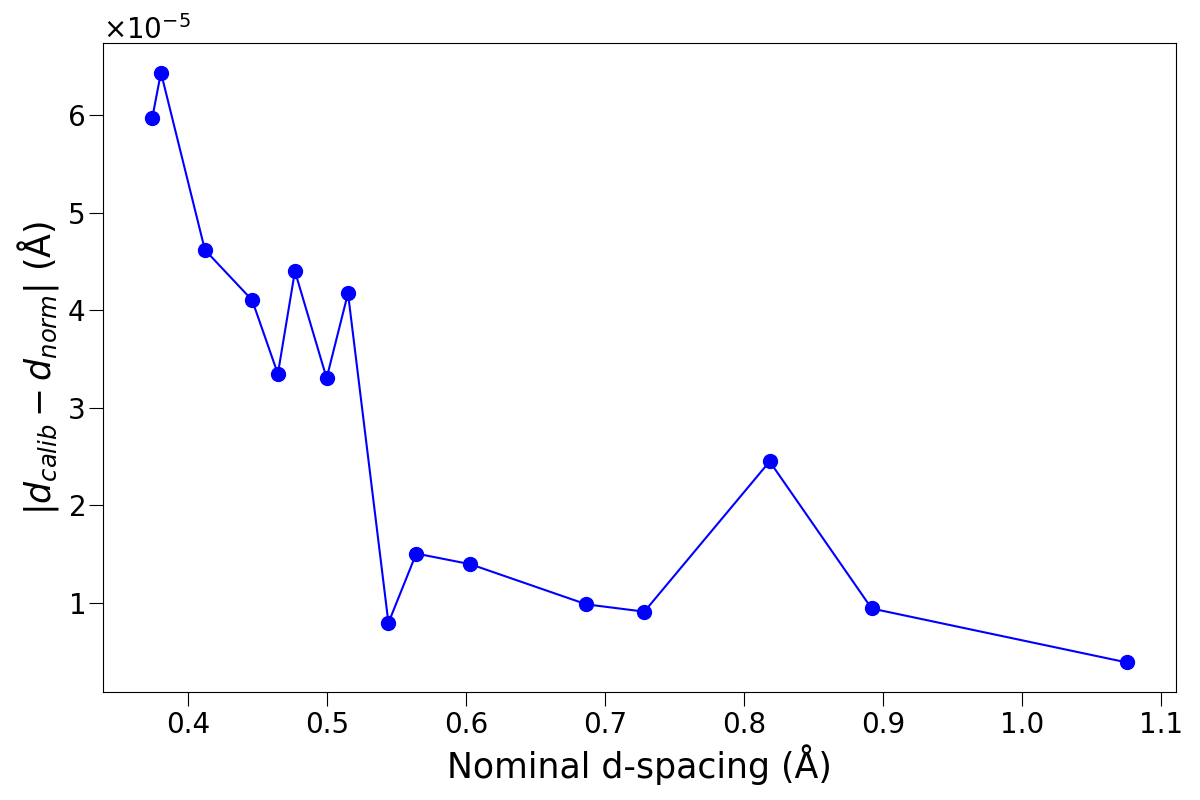

In [106]:
d_calib_diff = list()
for count, item in enumerate(d_fitted):
    d_tmp = solve_d(item, calib_coeff[0], calib_coeff[1], calib_coeff[2])
    d_calib_diff.append(abs(d_tmp - d_norm[count]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_calib_diff, 'bo-', markersize=10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel(r'$|d_{calib} - d_{norm}|$ (Å)', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_4_d_calib_d_norm_diff.png', dpi=300)
plt.show()

# Bank-5

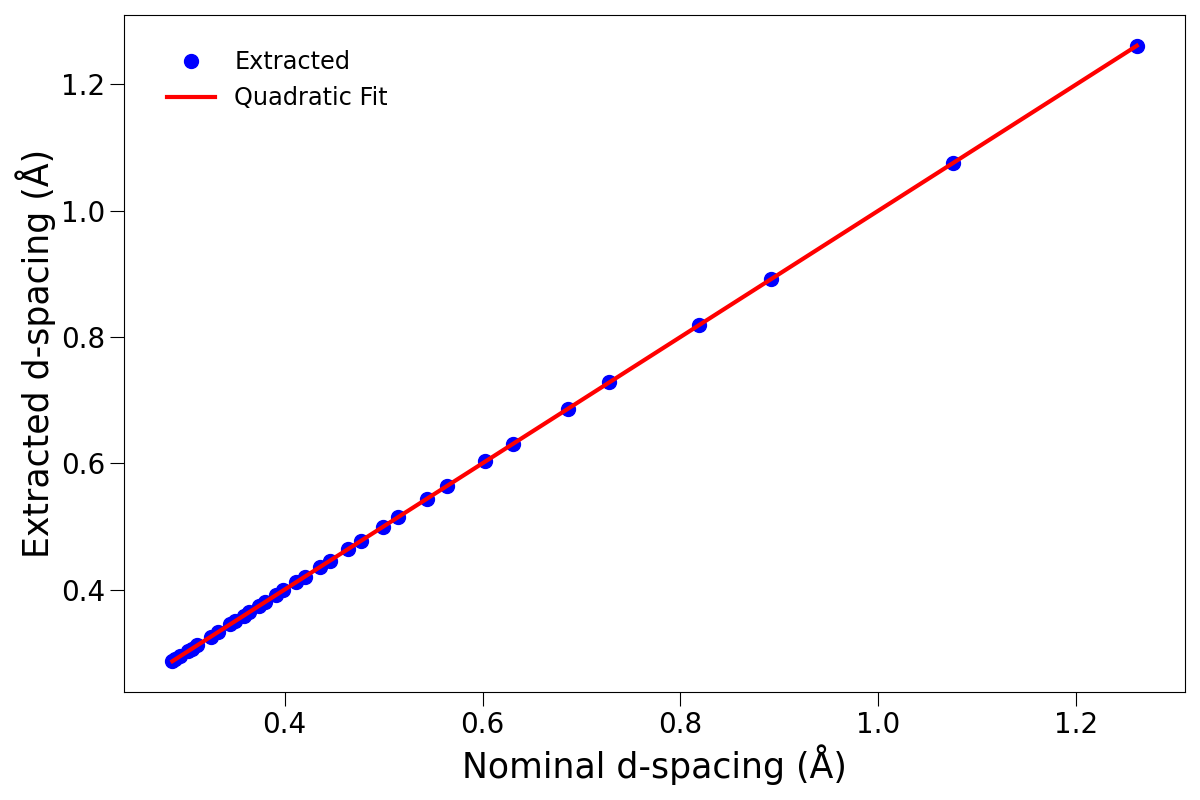

In [107]:
d_norm = [
    0.286519,
    0.289332,
    0.294212,
    0.30256,
    0.305879,
    0.311662,
    0.325633,
    0.332637,
    0.344847,
    0.349786,
    0.35851,
    0.364069,
    0.373937,
    0.380257,
    0.391543,
    0.398817,
    0.411897,
    0.42039,
    0.435794,
    0.445891,
    0.464401,
    0.476678,
    0.499498,
    0.514871,
    0.543982,
    0.564013,
    0.602955,
    0.630585,
    0.686494,
    0.728137,
    0.818356,
    0.891782,
    1.07553,
    1.261171]

d_fitted = [
    0.28673336089040624,
    0.2894500171258337,
    0.2944953123372573,
    0.30280931775874165,
    0.3060185277278231,
    0.3118489809872939,
    0.3257934437892923,
    0.332829701237458,
    0.3450280678007215,
    0.3499560681541149,
    0.3587071057708505,
    0.364245334624949,
    0.3741414950810197,
    0.380434908159276,
    0.3917495648660205,
    0.39900354475552713,
    0.4121004157640658,
    0.4205748532814535,
    0.4359964153609673,
    0.44607827481453444,
    0.4646203595269751,
    0.47686539019372254,
    0.49971501767790943,
    0.5150638650417353,
    0.5442022394911543,
    0.5642253552814644,
    0.6031844555164824,
    0.6308034638858933,
    0.6861433666732615,
    0.7283752796848479,
    0.818635142929903,
    0.8920713185464499,
    1.075674826813222,
    1.2612586770329681]

calib_coeff, cov_m = np.polyfit(d_norm, d_fitted, 2, cov=True)
calib_coeff_banks.append(calib_coeff)
cov_m_banks.append(cov_m)

d_calib = [calib_coeff[0] * d**2. + calib_coeff[1] * d + calib_coeff[2] for d in d_norm]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_fitted, 'bo', markersize=10, label="Extracted")
ax.plot(d_norm, d_calib, 'r-', linewidth=3, label="Quadratic Fit")

ax.set_xlabel(r'Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel('Extracted d-spacing (Å)', fontsize=25)
# ax.set_xlim([800, 6000])
# ax.set_xticks(np.arange(800, 6400, 800), fontsize=23)
ax.tick_params(axis='x', labelsize=20, length=10)
# ax.set_yticks(np.arange(0.5, 2.2, 0.2), fontsize=23)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False, fontsize="xx-large")
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_5_d_extract_d_norm.png', dpi=300)
plt.show()

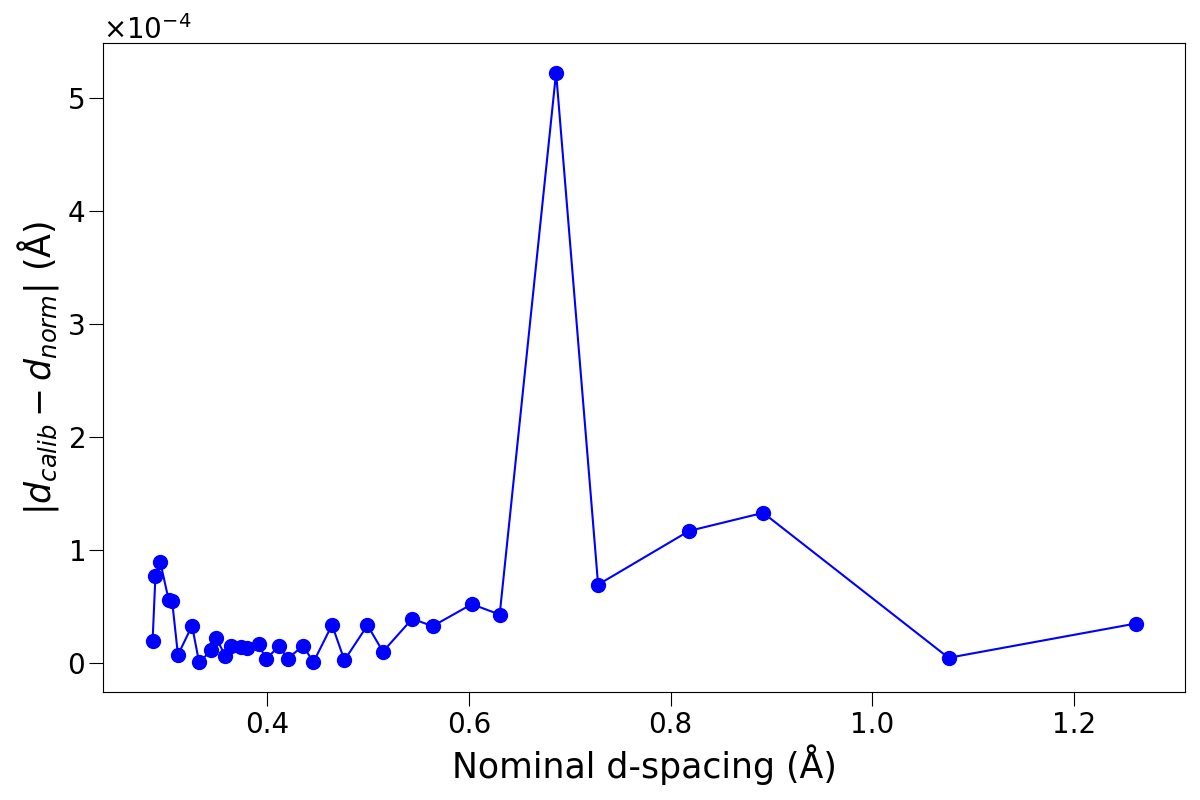

In [108]:
d_calib_diff = list()
for count, item in enumerate(d_fitted):
    d_tmp = solve_d(item, calib_coeff[0], calib_coeff[1], calib_coeff[2])
    d_calib_diff.append(abs(d_tmp - d_norm[count]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_calib_diff, 'bo-', markersize=10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel(r'$|d_{calib} - d_{norm}|$ (Å)', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_5_d_calib_d_norm_diff.png', dpi=300)
plt.show()

# Bank-6

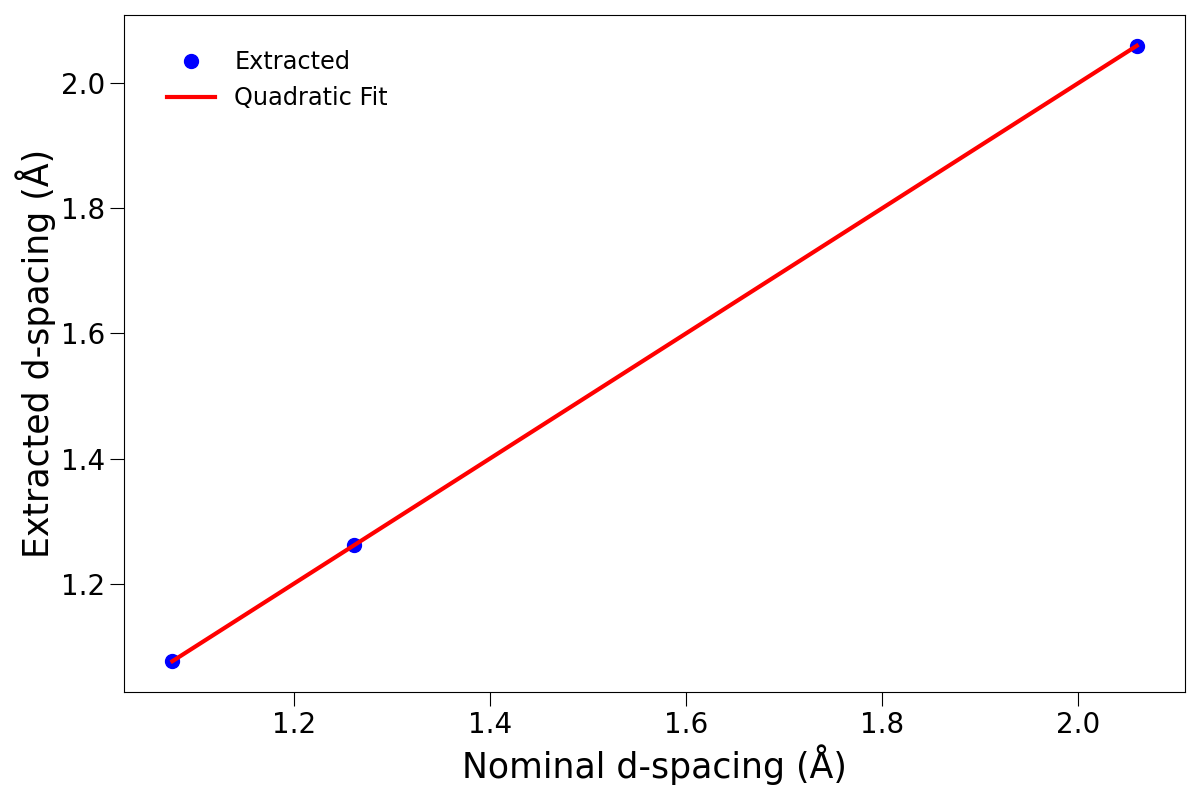

In [109]:
d_norm = [
    1.07553,
    1.261171,
    2.059483]

d_fitted = [
    1.076854958691705,
    1.2620967522713302,
    2.0589737974113858]

calib_coeff, cov_m = np.polyfit(d_norm, d_fitted, 1, cov=True)
calib_coeff_banks.append(calib_coeff)
cov_m_banks.append(cov_m)

d_calib = [calib_coeff[0] * d + calib_coeff[1] for d in d_norm]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_fitted, 'bo', markersize=10, label="Extracted")
ax.plot(d_norm, d_calib, 'r-', linewidth=3, label="Quadratic Fit")

ax.set_xlabel(r'Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel('Extracted d-spacing (Å)', fontsize=25)
# ax.set_xlim([800, 6000])
# ax.set_xticks(np.arange(800, 6400, 800), fontsize=23)
ax.tick_params(axis='x', labelsize=20, length=10)
# ax.set_yticks(np.arange(0.5, 2.2, 0.2), fontsize=23)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False, fontsize="xx-large")
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_6_d_extract_d_norm.png', dpi=300)
plt.show()

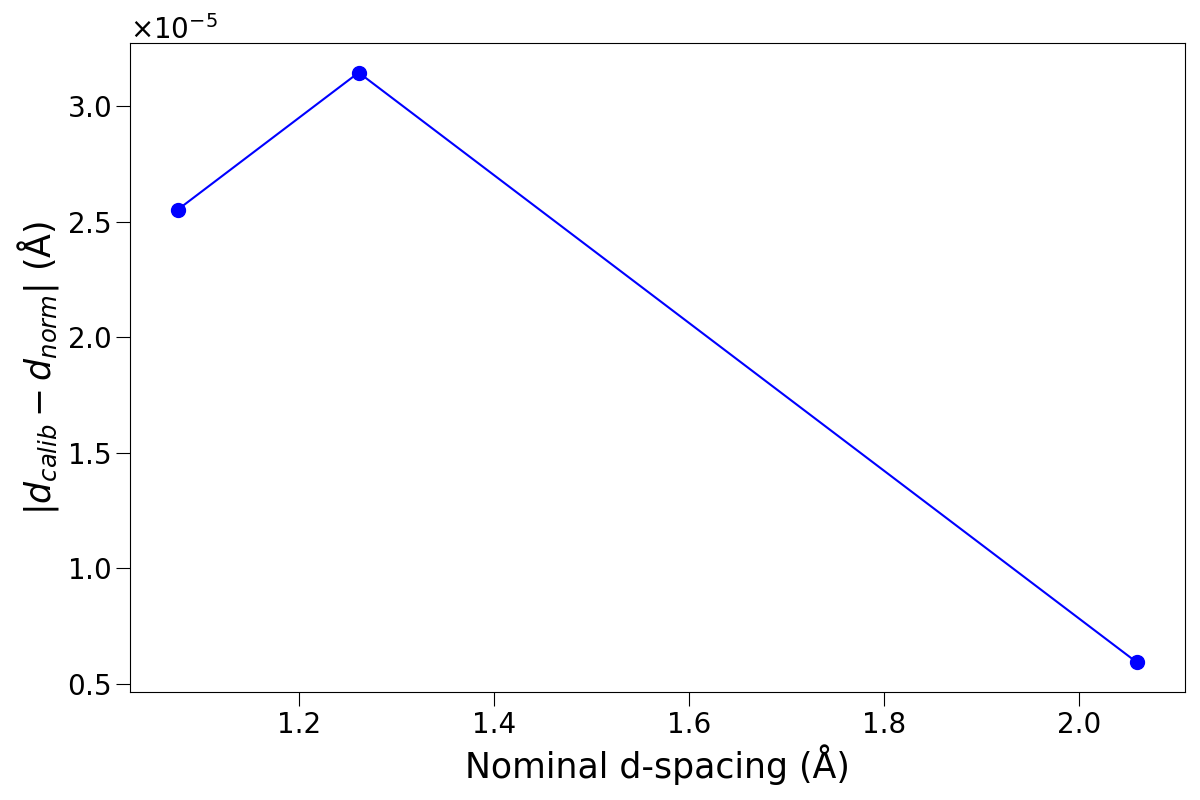

In [110]:
d_calib_diff = list()
for count, item in enumerate(d_fitted):
    d_tmp = solve_d_a(item, calib_coeff[0], calib_coeff[1])
    d_calib_diff.append(abs(d_tmp - d_norm[count]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(d_norm, d_calib_diff, 'bo-', markersize=10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1, 1)) 
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Nominal d-spacing (Å)', fontsize=25)
ax.set_ylabel(r'$|d_{calib} - d_{norm}|$ (Å)', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False

fig.savefig('Bank_6_d_calib_d_norm_diff.png', dpi=300)
plt.show()

# Output the calibration contants and their uncertainties

In [111]:
coeff_name = ["difa", "difc", "tzero"]
with open("calib_coeffs_banks.info", "w") as f:
    f.write("-" * 50 + "\n")
    f.write("{0:<12s}{1: >15s}{2:<5s}{3:<15s}\n".format("Param", "Value", " " * 5, "Uncertainty"))
    f.write("-" * 50 + "\n")
    for count, item in enumerate(calib_coeff_banks):
        for count_in, entry in enumerate(item):
            f.write("{0:<12s}{1:>15.5F}{2:<5s}{3:<15.5F}\n".format(
                f"{coeff_name[count_in]}_bank-{count + 1}",
                entry * difc_init_banks[count],
                " +/- ",
                cov_m_banks[count][count_in][count_in] * difc_init_banks[count]))
    f.write("-" * 50)

# Plot uncertainties of calibration constants versus bank

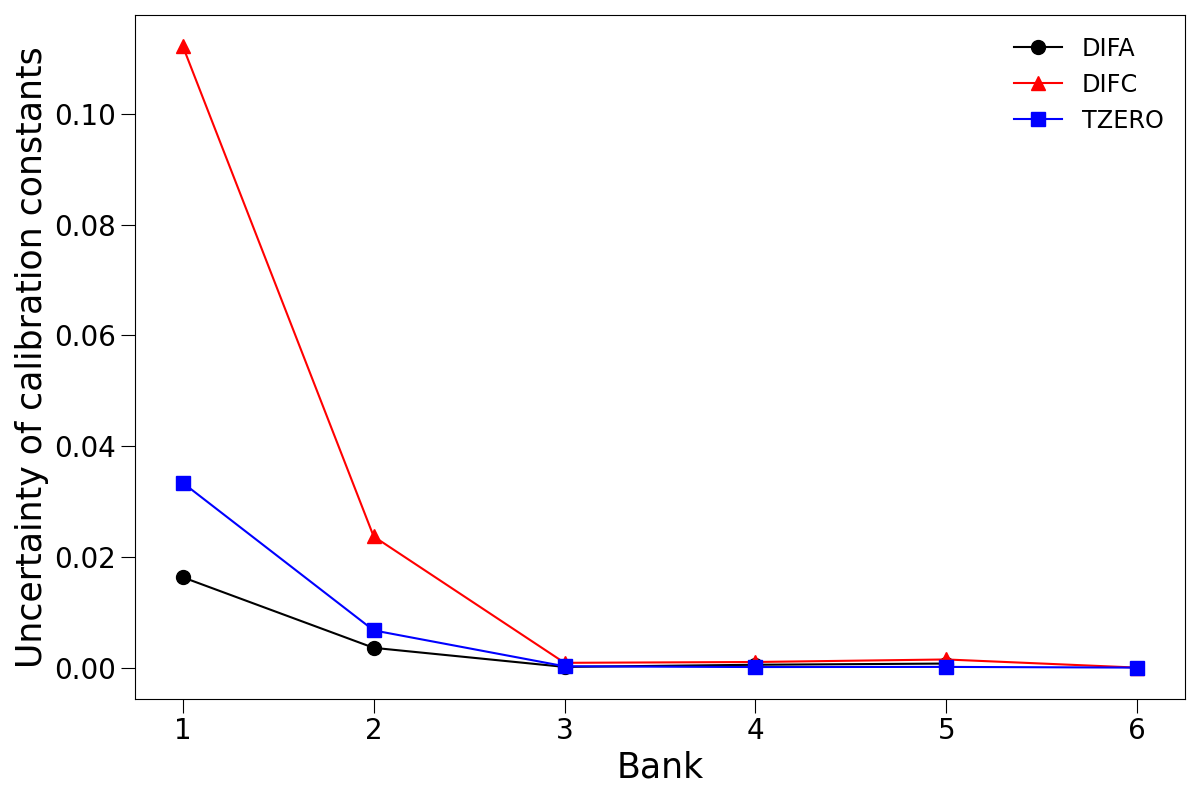

In [112]:
banks = list()
difa_err = list()
difc_err = list()
tzero_err = list()
for count, item in enumerate(cov_m_banks):
    banks.append(count + 1)
    if count == 5:
        difc_err.append(item[0][0] * difc_init_banks[count])
        tzero_err.append(item[1][1] * difc_init_banks[count])
    else:
        difa_err.append(item[0][0] * difc_init_banks[count])
        difc_err.append(item[1][1] * difc_init_banks[count])
        tzero_err.append(item[2][2] * difc_init_banks[count])

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(banks[:5], difa_err, 'ko-', markersize=10, label="DIFA")
ax.plot(banks, difc_err, 'r^-', markersize=10, label="DIFC")
ax.plot(banks, tzero_err, 'bs-', markersize=10, label="TZERO")

ax.set_xlabel('Bank', fontsize=25)
ax.set_ylabel('Uncertainty of calibration constants', fontsize=25)
ax.tick_params(axis='x', labelsize=20, length=10)
ax.yaxis.offsetText.set_fontsize(20)
ax.tick_params(axis='y', labelsize=20, length=10)
plt.tight_layout()
fig.canvas.header_visible = False
ax.legend(loc='upper right', frameon=False, fontsize="xx-large")

fig.savefig('Calib_const_uncertainty.png', dpi=300)
plt.show()